In [2]:
set.seed(7)
# load the library
library(mlbench)
library(caret)
# load the data
data(PimaIndiansDiabetes)

Loading required package: lattice

Loading required package: ggplot2



In [8]:
head(PimaIndiansDiabetes)
head(PimaIndiansDiabetes[,1:8])


,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,6,148,72,35,0,33.6,0.627,50,pos
2,1,85,66,29,0,26.6,0.351,31,neg
3,8,183,64,0,0,23.3,0.672,32,pos
4,1,89,66,23,94,28.1,0.167,21,neg
5,0,137,40,35,168,43.1,2.288,33,pos
6,5,116,74,0,0,25.6,0.201,30,neg


,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,6,148,72,35,0,33.6,0.627,50
2,1,85,66,29,0,26.6,0.351,31
3,8,183,64,0,0,23.3,0.672,32
4,1,89,66,23,94,28.1,0.167,21
5,0,137,40,35,168,43.1,2.288,33
6,5,116,74,0,0,25.6,0.201,30


In [3]:
# calculate correlation matrix
correlationMatrix <- cor(PimaIndiansDiabetes[,1:8])
# summarize the correlation matrix
print(correlationMatrix)
# find attributes that are highly corrected (ideally >0.75)
highlyCorrelated <- findCorrelation(correlationMatrix, cutoff=0.5)
# print indexes of highly correlated attributes
print(highlyCorrelated)

            pregnant    glucose   pressure     triceps     insulin       mass
pregnant  1.00000000 0.12945867 0.14128198 -0.08167177 -0.07353461 0.01768309
glucose   0.12945867 1.00000000 0.15258959  0.05732789  0.33135711 0.22107107
pressure  0.14128198 0.15258959 1.00000000  0.20737054  0.08893338 0.28180529
triceps  -0.08167177 0.05732789 0.20737054  1.00000000  0.43678257 0.39257320
insulin  -0.07353461 0.33135711 0.08893338  0.43678257  1.00000000 0.19785906
mass      0.01768309 0.22107107 0.28180529  0.39257320  0.19785906 1.00000000
pedigree -0.03352267 0.13733730 0.04126495  0.18392757  0.18507093 0.14064695
age       0.54434123 0.26351432 0.23952795 -0.11397026 -0.04216295 0.03624187
            pedigree         age
pregnant -0.03352267  0.54434123
glucose   0.13733730  0.26351432
pressure  0.04126495  0.23952795
triceps   0.18392757 -0.11397026
insulin   0.18507093 -0.04216295
mass      0.14064695  0.03624187
pedigree  1.00000000  0.03356131
age       0.03356131  1.00000000
[

ROC curve variable importance

         Importance
glucose      0.7881
mass         0.6876
age          0.6869
pregnant     0.6195
pedigree     0.6062
pressure     0.5865
triceps      0.5536
insulin      0.5379


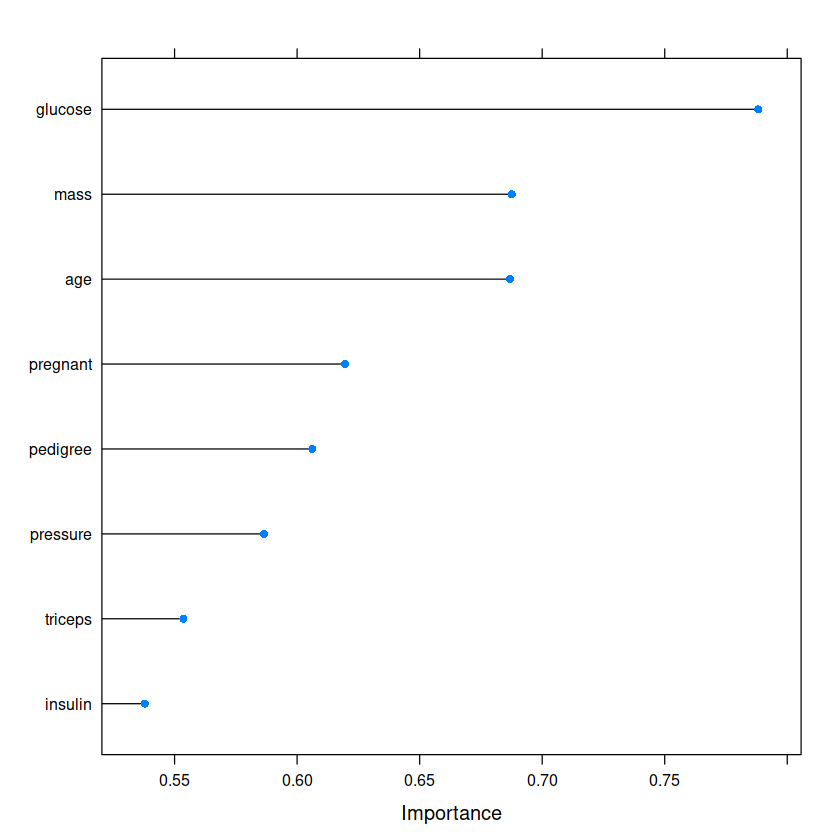

In [4]:
set.seed(7)
# load the library
library(mlbench)
library(caret)
# load the dataset
data(PimaIndiansDiabetes)
# prepare training scheme
control <- trainControl(method="repeatedcv", number=10, repeats=3)
# train the model
model <- train(diabetes~., data=PimaIndiansDiabetes, method="lvq", preProcess="scale", trControl=control)
# estimate variable importance
importance <- varImp(model, scale=FALSE)
# summarize importance
print(importance)
# plot importance
plot(importance)


Recursive feature selection

Outer resampling method: Cross-Validated (10 fold) 

Resampling performance over subset size:

 Variables Accuracy  Kappa AccuracySD KappaSD Selected
         1   0.7071 0.2957    0.03235 0.09669         
         2   0.7487 0.4263    0.03914 0.08962         
         3   0.7579 0.4539    0.03966 0.08767         
         4   0.7631 0.4699    0.05373 0.11706         
         5   0.7605 0.4656    0.04037 0.07910         
         6   0.7631 0.4660    0.03316 0.06588         
         7   0.7591 0.4579    0.03739 0.06966         
         8   0.7670 0.4696    0.03926 0.08056        *

The top 5 variables (out of 8):
   glucose, mass, age, pregnant, insulin



[1] "glucose"  "mass"     "age"      "pregnant" "insulin"  "pedigree" "triceps" 
[8] "pressure"

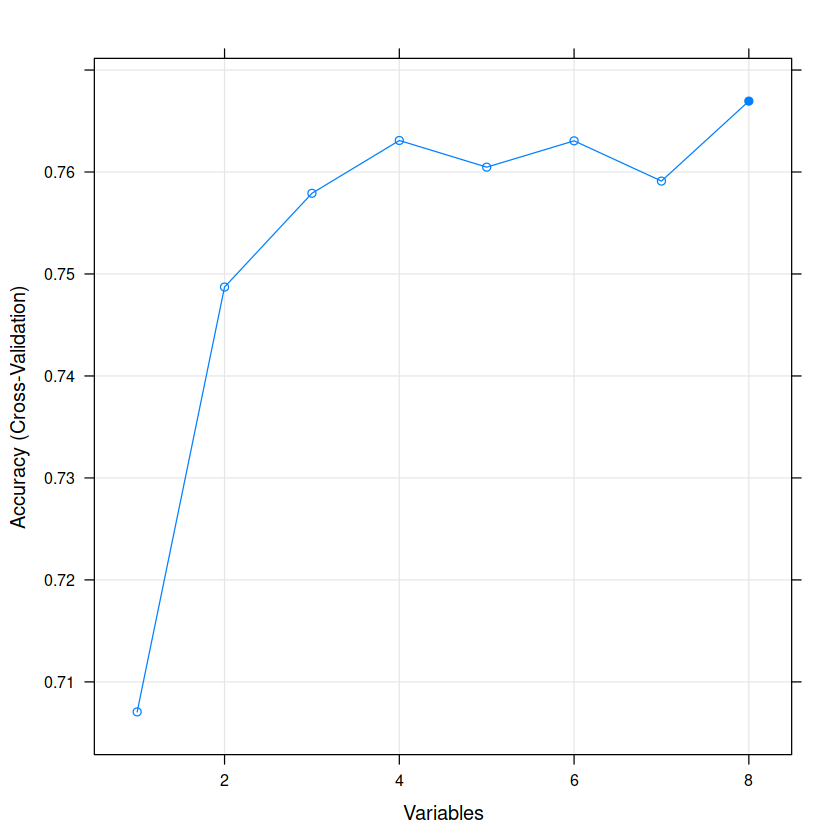

In [5]:
set.seed(7)
# load the library
library(mlbench)
library(caret)
# load the data
data(PimaIndiansDiabetes)
# define the control using a random forest selection function
control <- rfeControl(functions=rfFuncs, method="cv", number=10)
# run the RFE algorithm
results <- rfe(PimaIndiansDiabetes[,1:8], PimaIndiansDiabetes[,9], sizes=c(1:8), rfeControl=control)
# summarize the results
print(results)
# list the chosen features
predictors(results)
# plot the results
plot(results, type=c("g", "o"))